In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# DESENVOLVIDO POR THIAGO BARBOSA DE ARAÚJO
<p>
Este projeto tem como objetivo implementar e ajustar modelos de classificação para auxiliar na identificação de pacientes com maior risco de doenças cardíacas, utilizando dados clínicos de fácil acesso. Serão explorados diferentes algoritmos de aprendizado de máquina, incluindo Regressão Logística, Redes Neurais Artificiais (RNA), Máquinas de Vetores de Suporte (SVM), Árvores de Decisão  e Floresta Aleatória . O foco principal é desenvolver um modelo preditivo capaz de detectar com precisão indivíduos que apresentam doenças cardíacas.
</p>

<ul>
<li>Os dados de treinamento foram obtidos a partir do kaggle. <br>
 <a>https://docs.google.com/spreadsheets/d/16oF0nafLsdwsbvOSBQjA8FG4Jv85Bbf0Dha9PUAaTRg/export?format=csv</a></li>
<li> Aplicaremos algoritmos de aprendizado de máquina, como Regressão Logística, Random Forest, SVM e Redes Neurais, para identificar padrões nos dados</li>
<li>Também será necessárioo uso de métricas como acurácia, precisão, recall e suporte para medir o desempenho do modelo</li>

<table>
    <thead>
        <tr>
            <th style="font-size: 16px; text-align: left;"><b>Variável</b></th>
            <th style="font-size: 16px; text-align: left;"><b>Descrição</b></th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td style="font-size: 16px;">age</td>
            <td style="font-size: 16px;">Idade do paciente em anos</td>
        </tr>
        <tr>
            <td style="font-size: 16px;">sex</td>
            <td style="font-size: 16px;">Gênero do paciente (0 = masculino, 1 = feminino)</td>
        </tr>
        <tr>
            <td style="font-size: 16px;">cp</td>
            <td style="font-size: 16px;">Tipo de dor no peito:</td>
        </tr>
        <tr>
            <td style="font-size: 16px;"></td>
            <td style="font-size: 16px;">0: Angina típica</td>
        </tr>
        <tr>
            <td style="font-size: 16px;"></td>
            <td style="font-size: 16px;">1: Angina atípica</td>
        </tr>
        <tr>
            <td style="font-size: 16px;"></td>
            <td style="font-size: 16px;">2: Dor não-anginosa</td>
        </tr>
        <tr>
            <td style="font-size: 16px;"></td>
            <td style="font-size: 16px;">3: Assintomática</td>
        </tr>
        <tr>
            <td style="font-size: 16px;">trestbps</td>
            <td style="font-size: 16px;">Pressão arterial de repouso em mmHg</td>
        </tr>
        <tr>
            <td style="font-size: 16px;">chol</td>
            <td style="font-size: 16px;">Colesterol sérico em mg/dl</td>
        </tr>
        <tr>
            <td style="font-size: 16px;">fbs</td>
            <td style="font-size: 16px;">Nível de açúcar no sangue em jejum, categorizado como acima de 120 mg/dl (1 = sim, 0 = não)</td>
        </tr>
        <tr>
            <td style="font-size: 16px;">restecg</td>
            <td style="font-size: 16px;">Resultados do eletrocardiograma de repouso:</td>
        </tr>
        <tr>
            <td style="font-size: 16px;"></td>
            <td style="font-size: 16px;">0: Normal</td>
        </tr>
        <tr>
            <td style="font-size: 16px;"></td>
            <td style="font-size: 16px;">1: Com anormalidade da onda ST-T</td>
        </tr>
        <tr>
            <td style="font-size: 16px;"></td>
            <td style="font-size: 16px;">2: Mostrando hipertrofia ventricular esquerda provável ou definitiva</td>
        </tr>
        <tr>
            <td style="font-size: 16px;">thalach</td>
            <td style="font-size: 16px;">Frequência cardíaca máxima atingida durante um teste de esforço</td>
        </tr>
        <tr>
            <td style="font-size: 16px;">exang</td>
            <td style="font-size: 16px;">Angina induzida por exercício (1 = sim, 0 = não)</td>
        </tr>
        <tr>
            <td style="font-size: 16px;">oldpeak</td>
            <td style="font-size: 16px;">Depressão do segmento ST induzida por exercício em relação ao repouso</td>
        </tr>
        <tr>
            <td style="font-size: 16px;">slope</td>
            <td style="font-size: 16px;">Inclinação do segmento ST de pico no exercício:</td>
        </tr>
        <tr>
            <td style="font-size: 16px;"></td>
            <td style="font-size: 16px;">0: Subida</td>
        </tr>
        <tr>
            <td style="font-size: 16px;"></td>
            <td style="font-size: 16px;">1: Plano</td>
        </tr>
        <tr>
            <td style="font-size: 16px;"></td>
            <td style="font-size: 16px;">2: Descida</td>
        </tr>
        <tr>
            <td style="font-size: 16px;">ca</td>
            <td style="font-size: 16px;">Número de vasos principais (0-4) coloridos por fluoroscopia</td>
        </tr>
        <tr>
            <td style="font-size: 16px;">thal</td>
            <td style="font-size: 16px;">Resultado do teste de estresse com tálio:</td>
        </tr>
        <tr>
            <td style="font-size: 16px;"></td>
            <td style="font-size: 16px;">0: Normal</td>
        </tr>
        <tr>
            <td style="font-size: 16px;"></td>
            <td style="font-size: 16px;">1: Defeito fixo</td>
        </tr>
        <tr>
            <td style="font-size: 16px;"></td>
            <td style="font-size: 16px;">2: Defeito reversível</td>
        </tr>
        <tr>
            <td style="font-size: 16px;"></td>
            <td style="font-size: 16px;">3: Não descrito</td>
        </tr>
        <tr>
            <td style="font-size: 16px;">target</td>
            <td style="font-size: 16px;">Status de doença cardíaca (0 = sem doença, 1 = presença de doença)</td>
        </tr>
    </tbody>
</table>




Carregando DATASET



In [ ]:
url = 'https://docs.google.com/spreadsheets/d/16oF0nafLsdwsbvOSBQjA8FG4Jv85Bbf0Dha9PUAaTRg/export?format=csv'
df = pd.read_csv(url)

#PRÉ PROCESSAMENTO

Matriz de correlação para identificar relações fracas e fortes com o target

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


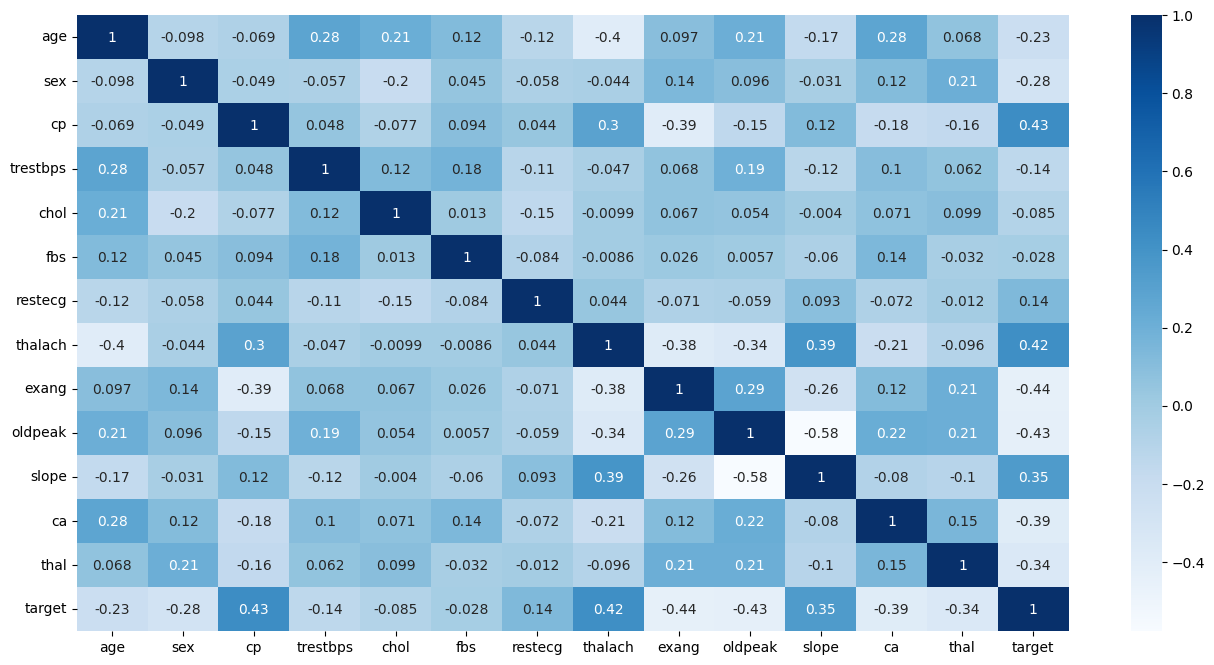

In [ ]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(), annot=True, cmap='Blues')
df.corr()

##1 - Removendo dados irrelevantes

In [ ]:
correlation_matrix = df.corr()  # Calcula a matriz de correlação

# Obter as correlações com a variável 'target'
target_corr = correlation_matrix['target']

# Ordenar as correlações com 'target' em ordem decrescente
sorted_corr = target_corr.sort_values(ascending=False)

# Exibir as correlações ordenadas
print(sorted_corr)

target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64


In [ ]:
colunas_para_remover = [ 'chol', 'fbs' , 'restecg', 'trestbps']

# Criar um novo DataFrame sem colunas relevantes para a previsão do modelo

df2 = df.drop(columns=colunas_para_remover)

df2.head()

,age,sex,cp,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,150,0,2.3,0,0,1,1
1,37,1,2,187,0,3.5,0,0,2,1
2,41,0,1,172,0,1.4,2,0,2,1
3,56,1,1,178,0,0.8,2,0,2,1
4,57,0,0,163,1,0.6,2,0,2,1


##2 - Verificando valores ausentes / duplicados

In [ ]:
# Sem registro de valores ausentes
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      303 non-null    int64  
 1   sex      303 non-null    int64  
 2   cp       303 non-null    int64  
 3   thalach  303 non-null    int64  
 4   exang    303 non-null    int64  
 5   oldpeak  303 non-null    float64
 6   slope    303 non-null    int64  
 7   ca       303 non-null    int64  
 8   thal     303 non-null    int64  
 9   target   303 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 23.8 KB


In [ ]:

# Exibir todas as linhas duplicadas
duplicated_rows_all = df2[df.duplicated(keep=False)]

# Exibir as duplicadas
print(f' linhas duplicadas no data frame 2:\n {duplicated_rows_all}')

#Removendo dúplicadas e criando novo dataFrame

df3 = df2.drop_duplicates(keep='first')


 linhas duplicadas no data frame 2:
      age  sex  cp  thalach  exang  oldpeak  slope  ca  thal  target
163   38    1   2      173      0      0.0      2   4     2       1
164   38    1   2      173      0      0.0      2   4     2       1


In [ ]:
df3.head()

,age,sex,cp,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,150,0,2.3,0,0,1,1
1,37,1,2,187,0,3.5,0,0,2,1
2,41,0,1,172,0,1.4,2,0,2,1
3,56,1,1,178,0,0.8,2,0,2,1
4,57,0,0,163,1,0.6,2,0,2,1


##3 - Tratar outliers

 <h2>Exibição da Distribuição dos Dados</h2>
    <p>A distribuição dos dados em uma coluna numérica é representada da seguinte forma:</p>
    <ul>
        <li><strong>Mediana</strong> (linha dentro da caixa): O valor central dos dados.</li>
        <li><strong>Quartis</strong> (caixa): A faixa do meio de 50% dos dados (do 1º ao 3º quartil).</li>
        <li><strong>Extremos</strong> (linhas ou "bigodes"): Representam o alcance normal dos dados.</li>
        <li><strong>Outliers</strong> (pontos fora dos bigodes): Valores muito diferentes do restante dos dados.</li>
    </ul>

,age,sex,cp,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


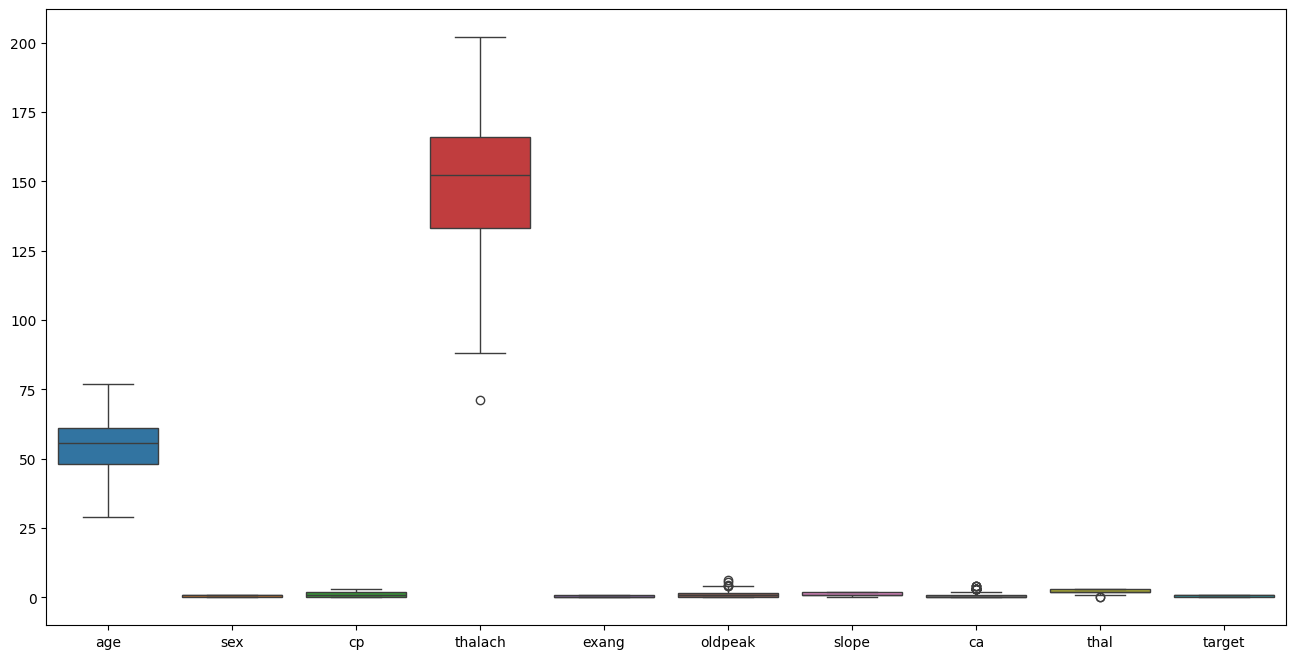

In [ ]:
plt.figure(figsize=(16,8))
sns.boxplot(data = df3)

df3.describe()

,age,sex,cp,thalach,exang,oldpeak,slope,ca,thal,target
count,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000
mean,53.642553,0.638298,1.051064,154.761702,0.289362,0.803830,1.510638,0.459574,2.370213,0.625532
std,9.148344,0.481519,1.024043,19.287596,0.454434,0.902481,0.572606,0.699102,0.483892,0.485018
min,29.000000,0.000000,0.000000,109.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
25%,46.000000,0.000000,0.000000,143.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,54.000000,1.000000,1.000000,158.000000,0.000000,0.500000,2.000000,0.000000,2.000000,1.000000
75%,60.000000,1.000000,2.000000,169.000000,1.000000,1.400000,2.000000,1.000000,3.000000,1.000000
max,76.000000,1.000000,3.000000,202.000000,1.000000,3.200000,2.000000,2.000000,3.000000,1.000000


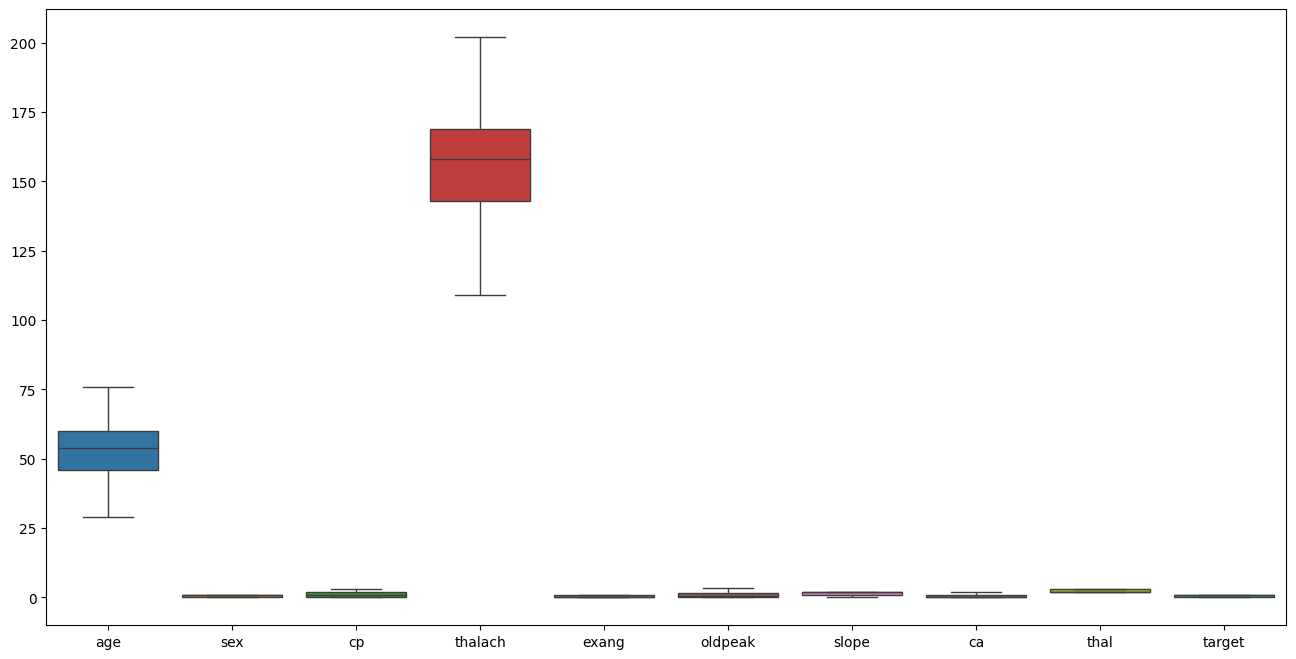

In [ ]:
# Tratando outlier

# p/ baixo
df4 = df3[df3['thalach'] > df3['thalach'].quantile(0.05)]
df4 = df4[df4['thal'] > df4['thal'].quantile(0.05)]

# p/ cima
df4 = df4[df4['oldpeak'] < df4['oldpeak'].quantile(0.95)]
df4 = df4[df4['ca'] < df4['ca'].quantile(0.95)]


plt.figure(figsize=(16,8))
sns.boxplot(data = df4 )
df4.describe()

In [ ]:
def identificar_outliers_iqr(df):
    outliers = {}
    for col in df.select_dtypes(include=[np.number]).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lim_inf = Q1 - 1.5 * IQR
        lim_sup = Q3 + 1.5 * IQR
        outliers[col] = df[col][(df[col] < lim_inf) | (df[col] > lim_sup)]
    return outliers

# Identificar outliers
outliers_iqr = identificar_outliers_iqr(df4)

# Exibir os outliers
for col, outliers in outliers_iqr.items():
    if not outliers.empty:
        print(f'Outliers na coluna {col}:')
        print(outliers)
    else:
        print(f'Nenhum outlier encontrado na coluna {col}')

Nenhum outlier encontrado na coluna age
Nenhum outlier encontrado na coluna sex
Nenhum outlier encontrado na coluna cp
Nenhum outlier encontrado na coluna thalach
Nenhum outlier encontrado na coluna exang
Nenhum outlier encontrado na coluna oldpeak
Nenhum outlier encontrado na coluna slope
Nenhum outlier encontrado na coluna ca
Nenhum outlier encontrado na coluna thal
Nenhum outlier encontrado na coluna target


##4- Tratando variáveis ​​categóricas e numericas

In [ ]:
# Verificando variaveis
for c in df4.columns:
  print(f"{c}: {df4[c].nunique()}")

age: 39
sex: 2
cp: 4
thalach: 75
exang: 2
oldpeak: 29
slope: 3
ca: 3
thal: 2
target: 2


In [ ]:
# Identificar colunas categóricas e numéricas
categorical_features = ['sex', 'cp', 'exang', 'slope', 'ca', 'thal']
numeric_features = ['age', 'thalach', 'oldpeak']

# Pré-processamento das features categóricas
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Pré-processamento das features númericas
numeric_transformer = StandardScaler()

# Criar um transformer para aplicar transformações nas colunas adequadas
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numeric_transformer, numeric_features)
    ],
    force_int_remainder_cols=False
)

In [ ]:
X_transformed = preprocessor.fit_transform(df4)

# Transformar o resultado em DataFrame
X_transformed_df = pd.DataFrame(X_transformed)

# Exibir o DataFrame resultante
print(X_transformed_df.head())


    0    1    2    3    4    5    6    7    8    9    10   11   12   13   14  \
0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0   
1  0.0  1.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0   
2  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0   
3  1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0   
4  0.0  1.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0   

    15        16        17        18  
0  0.0 -1.384900  0.895658  0.662000  
1  0.0  0.258241  1.207403 -0.004253  
2  0.0  0.367784  0.428041 -0.226337  
3  0.0  0.258241 -0.091534  0.550958  
4  1.0 -1.056271  0.947616 -0.892590  


#Construção dos modelos

## 5 -  Estabelecer pipelines e definindo modelos

In [ ]:
# Separar as features (X) e o target (y)
X = df4.drop(columns=['target'], axis=1)
y = df4['target']

In [ ]:
# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Resultados para Regressão Logística:
Acurácia Treino: 87.77%
Acurácia Teste: 82.98%
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.83      0.75      0.79        20
           1       0.83      0.89      0.86        27

    accuracy                           0.83        47
   macro avg       0.83      0.82      0.82        47
weighted avg       0.83      0.83      0.83        47

Matriz de Confusão:


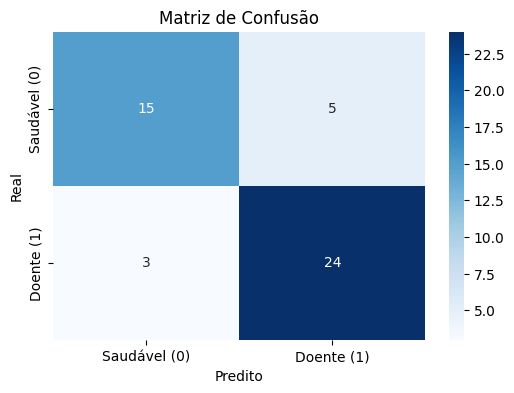

________________________________________________________________________________


Resultados para SVM:
Acurácia Treino: 92.02%
Acurácia Teste: 85.11%
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.88      0.75      0.81        20
           1       0.83      0.93      0.88        27

    accuracy                           0.85        47
   macro avg       0.86      0.84      0.84        47
weighted avg       0.85      0.85      0.85        47

Matriz de Confusão:


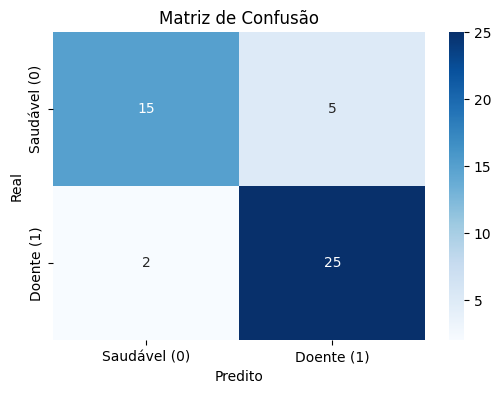

________________________________________________________________________________


Resultados para Random Forest:
Acurácia Treino: 100.00%
Acurácia Teste: 85.11%
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.88      0.75      0.81        20
           1       0.83      0.93      0.88        27

    accuracy                           0.85        47
   macro avg       0.86      0.84      0.84        47
weighted avg       0.85      0.85      0.85        47

Matriz de Confusão:


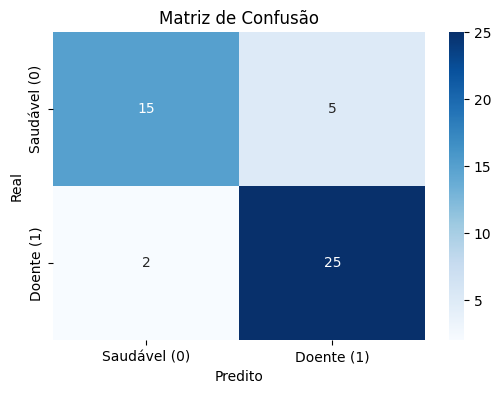

________________________________________________________________________________


Resultados para Árvore de Decisão:
Acurácia Treino: 100.00%
Acurácia Teste: 85.11%
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.88      0.75      0.81        20
           1       0.83      0.93      0.88        27

    accuracy                           0.85        47
   macro avg       0.86      0.84      0.84        47
weighted avg       0.85      0.85      0.85        47

Matriz de Confusão:


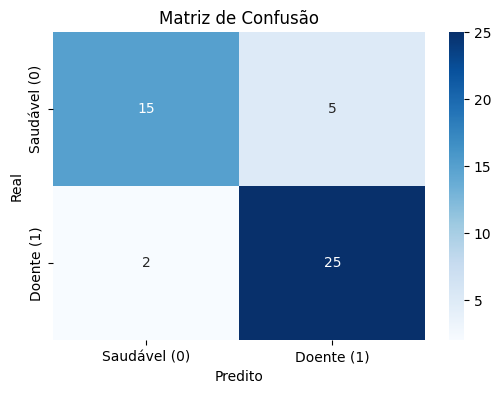

________________________________________________________________________________


Resultados para Rede Neural (MLP):
Acurácia Treino: 100.00%
Acurácia Teste: 89.36%
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.94      0.80      0.86        20
           1       0.87      0.96      0.91        27

    accuracy                           0.89        47
   macro avg       0.90      0.88      0.89        47
weighted avg       0.90      0.89      0.89        47

Matriz de Confusão:


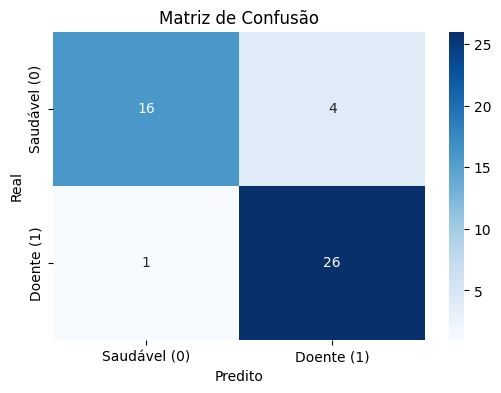

________________________________________________________________________________




In [ ]:
# Modelos para testar
modelos = {
    "Regressão Logística": LogisticRegression(),
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(),
    "Árvore de Decisão": DecisionTreeClassifier(),
    "Rede Neural (MLP)": MLPClassifier(hidden_layer_sizes=(200,100), max_iter=1000, random_state=42)

}
# Listas para armazenar as acurácias de treino e teste
modelos_resultados = []
# Loop para criar pipelines e testar diferentes modelos
for nome, modelo in modelos.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('modelo', modelo)  # Treina o modelo
    ])

    # Treinando o pipeline
    pipeline.fit(X_train, y_train)

    # Fazendo previsões
    y_pred = pipeline.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

     # Calculando as acurácias
    acuracia_treino = pipeline.score(X_train, y_train) * 100
    acuracia_teste = pipeline.score(X_test, y_test) * 100

    # Armazenando os resultados para o gráfico
    modelos_resultados.append((nome, acuracia_teste, acuracia_treino))

    # Exibindo métricas de avaliação

    print(f"Resultados para {nome}:")
    print(f"Acurácia Treino: {pipeline.score(X_train, y_train) * 100:.2f}%")
    print(f"Acurácia Teste: {pipeline.score(X_test, y_test) * 100:.2f}%")

    print("Relatório de Classificação:")
    print(classification_report(y_test, y_pred))


    print("Matriz de Confusão:")
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Saudável (0)", "Doente (1)"], yticklabels=["Saudável (0)", "Doente (1)"])
    plt.xlabel("Predito")
    plt.ylabel("Real")
    plt.title("Matriz de Confusão")
    plt.show()
    print("_" * 80)
    print('\n')

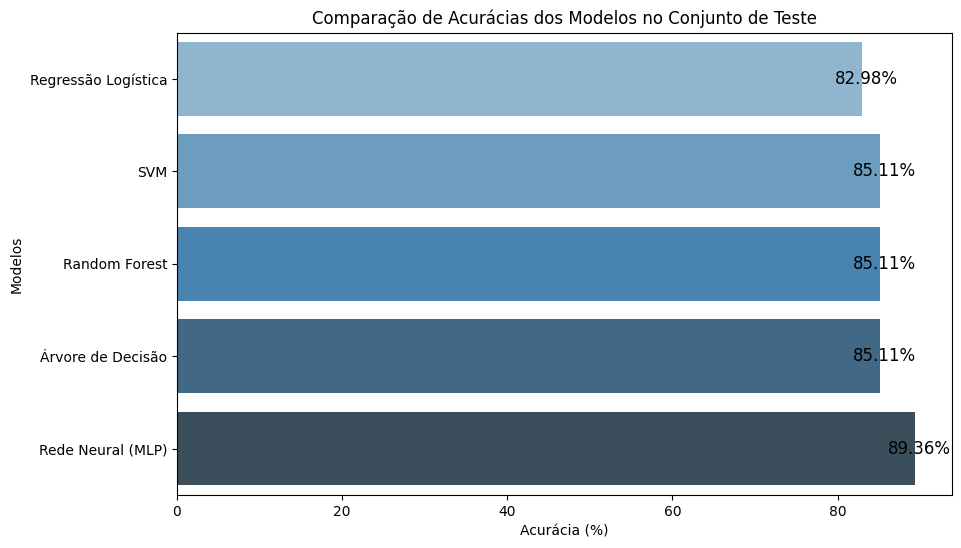

In [ ]:
# Criar gráfico comparativo das acurácias de teste de cada modelo
df_resultados = pd.DataFrame(modelos_resultados, columns=["Modelo", "Acurácia Teste", "Acurácia Treino"])

# Gráfico de comparação de Acurácias
plt.figure(figsize=(10,6))
ax = sns.barplot(x='Acurácia Teste', y='Modelo', data=df_resultados, palette='Blues_d', hue='Modelo')

# Adicionar o valor de acurácia nas barras
for p in ax.patches:
    ax.annotate(f'{p.get_width():.2f}%',  # Formata a porcentagem
                (p.get_width() + 0.5, p.get_y() + p.get_height() / 2),  # Ajuste para posição do rótulo
                ha='center', va='center', fontsize=12, color='black')

plt.title('Comparação de Acurácias dos Modelos no Conjunto de Teste')
plt.xlabel('Acurácia (%)')
plt.ylabel('Modelos')
plt.show()


#Função de previsão

In [ ]:
# Criando o DataFrame
df = df4

# Separando as features (X) e o target (y)
X = df.drop(columns=['target'])
y = df['target']

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Criando o pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', MLPClassifier(hidden_layer_sizes=(200, 100), max_iter=1000, random_state=42))
])

# Treinando o pipeline
pipeline.fit(X_train, y_train)

# Função para estimar se um paciente tem ou não doença cardíaca
def prever_doenca(novo_paciente, pipeline):
    # Criar um DataFrame com os dados do novo paciente
    df_novo = pd.DataFrame([novo_paciente])

    # Garantir que todas as colunas do modelo estejam presentes se alguma coluna estiver faltando, preencher com 0
    for col in X_train.columns:
        if col not in df_novo.columns:
            df_novo[col] = 0

    # Reordenar as colunas para corresponder à ordem usada no treinamento
    df_novo = df_novo[X_train.columns]

    # Fazer a previsão usando o pipeline
    previsao = pipeline.predict(df_novo)

    # Retornar o resultado
    return "Doente" if previsao[0] == 1 else "Saudável"


# Paciente exemplo
paciente1 = {
    'age': 45,
    'sex': 0,
    'cp': 0,
    'thalach': 180,
    'exang': 0,
    'oldpeak': 0.5,
    'slope': 2,
    'ca': 0,
    'thal': 2
}

paciente2 = {
    'age': 65,
    'sex': 1,
    'cp': 3,
    'thalach': 120,
    'exang': 1,
    'oldpeak': 3.0,
    'slope': 0,
    'ca': 3,
    'thal': 1
}

#pacientes do dataset
paciente4 = {
    'age': 56,
    'sex': 1,
    'cp': 1,
    'trestbps': 120,
    'chol': 236,
    'fbs': 0,
    'restecg': 1,
    'thalach': 178,
    'exang': 0,
    'oldpeak': 0.8,
    'slope': 2,
    'ca': 0,
    'thal': 2,
}

paciente5 = {
    'age': 41,
    'sex': 1,
    'cp': 0,
    'trestbps': 110,
    'chol': 172,
    'fbs': 0,
    'restecg': 0,
    'thalach': 158,
    'exang': 0,
    'oldpeak': 0.0,
    'slope': 2,
    'ca': 0,
    'thal': 3,
}

# Chamada da função com o pipeline treinado
resultado = prever_doenca(paciente5, pipeline)
print(f"Diagnóstico: {resultado}")

Diagnóstico: Saudável


,age,sex,cp,thalach,exang,oldpeak,slope,ca,thal,target
2,41,0,1,172,0,1.4,2,0,2,1
3,56,1,1,178,0,0.8,2,0,2,1
4,57,0,0,163,1,0.6,2,0,2,1
6,56,0,1,153,0,1.3,1,0,2,1
7,44,1,1,173,0,0.0,2,0,3,1
...,...,...,...,...,...,...,...,...,...,...
296,63,0,0,136,1,0.0,1,0,2,0
298,57,0,0,123,1,0.2,1,0,3,0
299,45,1,3,132,0,1.2,1,0,3,0
301,57,1,0,115,1,1.2,1,1,3,0
